In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing training and testing dataset
Train_data=pd.read_csv('train_agriculture.csv')
Test_data=pd.read_csv('test_agriculture.csv')

# Exploratory Data Analysis

In [3]:
#exploring first five rows of the train dataset
Train_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
#exploring last five rows of the test dataset
Test_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [5]:
#finding the shape of the dataset
print('Train_data:',Train_data.shape)
print('Test_data:',Test_data.shape)

Train_data: (4599, 10)
Test_data: (1199, 9)


Observation: Here we observe that test data has one less column. Target column is missing in Test_data,.

In [6]:
#finding description of data
Train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated_Insects_Count,4599.0,1363.000435,814.439120,150.0,731.0,1212.0,1786.0,4097.0
Crop_Type,4599.0,0.224831,0.417517,0.0,0.0,0.0,0.0,1.0
Soil_Type,4599.0,0.476625,0.499508,0.0,0.0,0.0,1.0,1.0
Pesticide_Use_Category,4599.0,2.283540,0.471978,1.0,2.0,2.0,3.0,3.0
Number_Doses_Week,4599.0,26.477495,15.524647,0.0,15.0,20.0,40.0,95.0
Number_Weeks_Used,4157.0,28.891027,12.586005,0.0,20.0,28.0,38.0,66.0
Number_Weeks_Quit,4599.0,9.205479,9.713253,0.0,0.0,7.0,16.0,47.0
Season,4599.0,1.894325,0.694952,1.0,1.0,2.0,2.0,3.0
Crop_Damage,4599.0,0.194390,0.454597,0.0,0.0,0.0,0.0,2.0


Observation: We observed that on an average a crop require 28 weeks to get ready.

In [7]:
#finding null values in train data set
Train_data.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In many places Number of week data is missing.

In [8]:
#finding null values in test data set
Test_data.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [9]:
#creating one column in the dataset to specify which is train and which is test attributes
Train_data['source']='train'
Test_data['source']='test'
df=pd.concat([Train_data,Test_data],ignore_index=True)

In [10]:
#Here we get the complete dataset by combining train and test dataset
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,F00000001,188,1,0,1,0,0.0,0,1,0.0,train
1,F00000003,209,1,0,1,0,0.0,0,2,1.0,train
2,F00000004,257,1,0,1,0,0.0,0,2,1.0,train
3,F00000005,257,1,1,1,0,0.0,0,2,1.0,train
4,F00000006,342,1,0,1,0,0.0,0,2,1.0,train
...,...,...,...,...,...,...,...,...,...,...,...
5793,F00003133,1132,0,1,2,40,34.0,7,3,NaN,test
5794,F00003135,1132,0,1,2,40,25.0,3,1,NaN,test
5795,F00003138,1132,0,1,2,20,13.0,23,1,NaN,test
5796,F00003149,1212,0,1,2,10,35.0,5,1,NaN,test


In [11]:
#finding null values in the dataset
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used           561
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
source                        0
dtype: int64

In [12]:
#finding shape of the complete dataset
df.shape

(5798, 11)

# Univariate Analysis

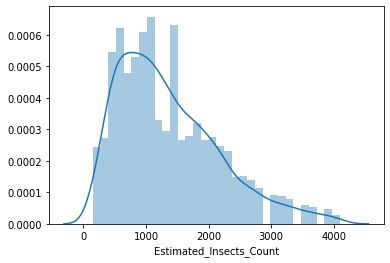

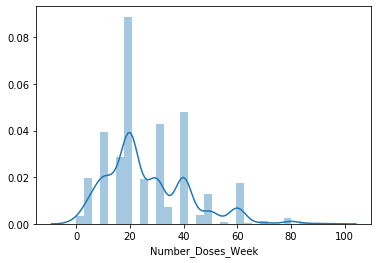

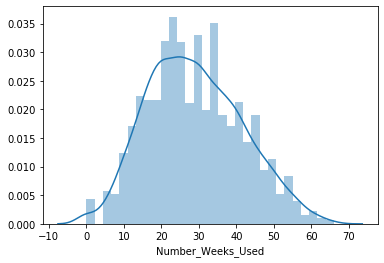

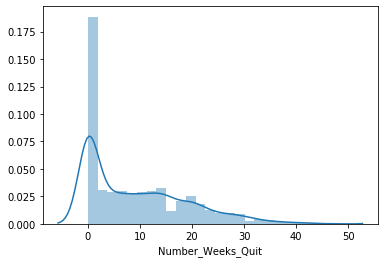

In [13]:
#visualizing distplot of non-categoric column
cols=['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit']
for i in cols:
    sns.distplot(Train_data[i].dropna())
    plt.show()
    

Observation: Here we observe that the majority of estimated insect count lies between 500 to 1500.

Majority of doses per week is 20.
Number of week quit: majority lies between 0 to 2 weeks.

We can see that the data is skewed.

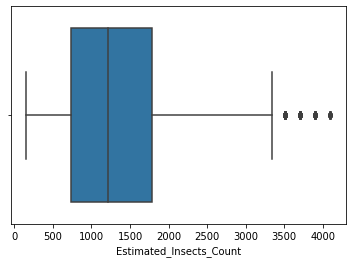

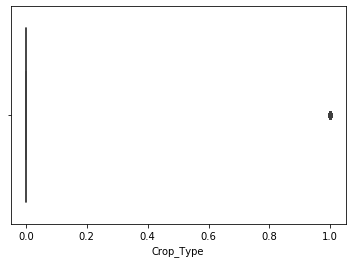

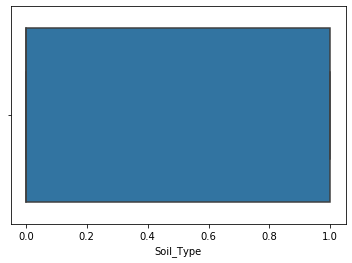

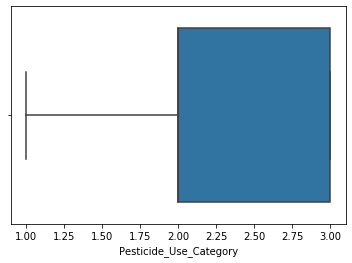

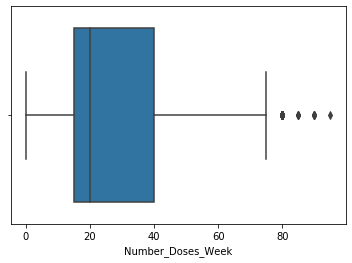

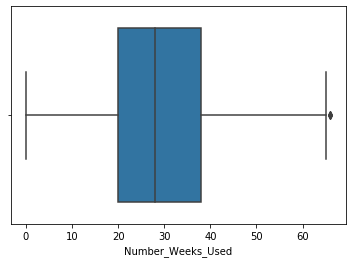

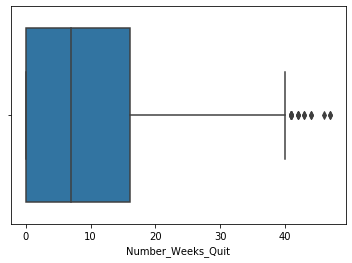

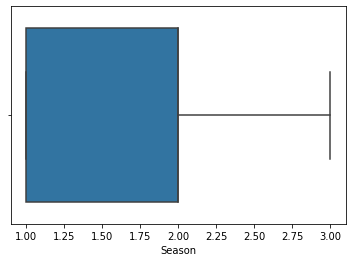

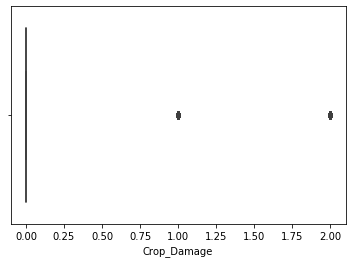

In [14]:
#Visualizing data by using boxplot
for i in Train_data.describe().columns:
    sns.boxplot(Train_data[i].dropna())
    plt.show()

In [15]:
#finding the value count of each item
df.Crop_Type.value_counts()

0    4531
1    1267
Name: Crop_Type, dtype: int64

In [16]:
df.Soil_Type.value_counts()

0    3060
1    2738
Name: Soil_Type, dtype: int64

In [17]:
df.Pesticide_Use_Category.value_counts()

2    3900
3    1831
1      67
Name: Pesticide_Use_Category, dtype: int64

In [18]:
df.Season.value_counts()

2    2946
1    1740
3    1112
Name: Season, dtype: int64

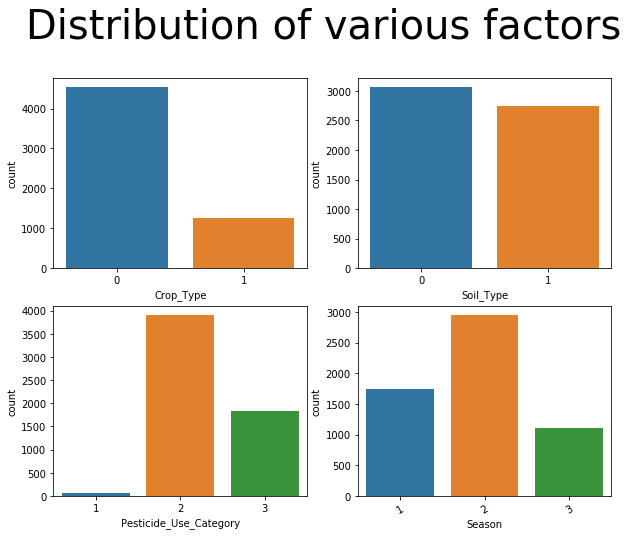

In [19]:
#data visualization by countplot

fig,ax = plt.subplots(2,2, figsize=(10,10))               # 'ax' has references to all the four axes
plt.suptitle("Distribution of various factors", fontsize=40)
sns.countplot(df['Crop_Type'], ax = ax[0,0]) 
sns.countplot(df['Soil_Type'], ax = ax[0,1]) 
sns.countplot(df['Pesticide_Use_Category'], ax = ax[1,0]) 
sns.countplot(df['Season'], ax = ax[1,1])
plt.xticks(rotation=30)
plt.subplots_adjust(bottom=0.3)
plt.show()

Observation: Majority of 0 type crop as per the given dataset.

             0 type soil is used much.
             
             Category 2 pesticide is used much for the crops.
             
             Majority of crop is grown in season 2.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

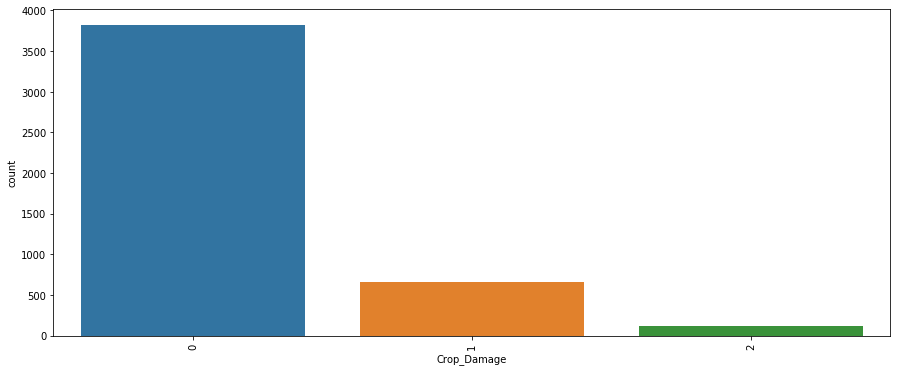

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(Train_data.Crop_Damage)
plt.xticks(rotation=90)

Observation: Here we see that majority of crop stay alive.

# Bivariate Analysis

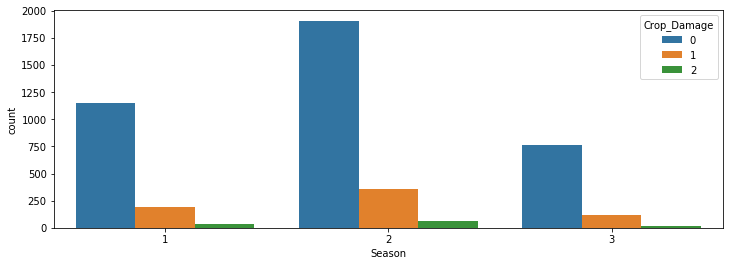

In [21]:
#Now let us visualize that how season and crop_damage are related to each other
plt.subplots(figsize=(12,4))
sns.countplot(x='Season',hue='Crop_Damage',data=Train_data)

Observation: Here we can see that in season 2 damage to the crop is very less. So it the suitable time for the crop.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]),
 <a list of 71 Text xticklabel objects>)

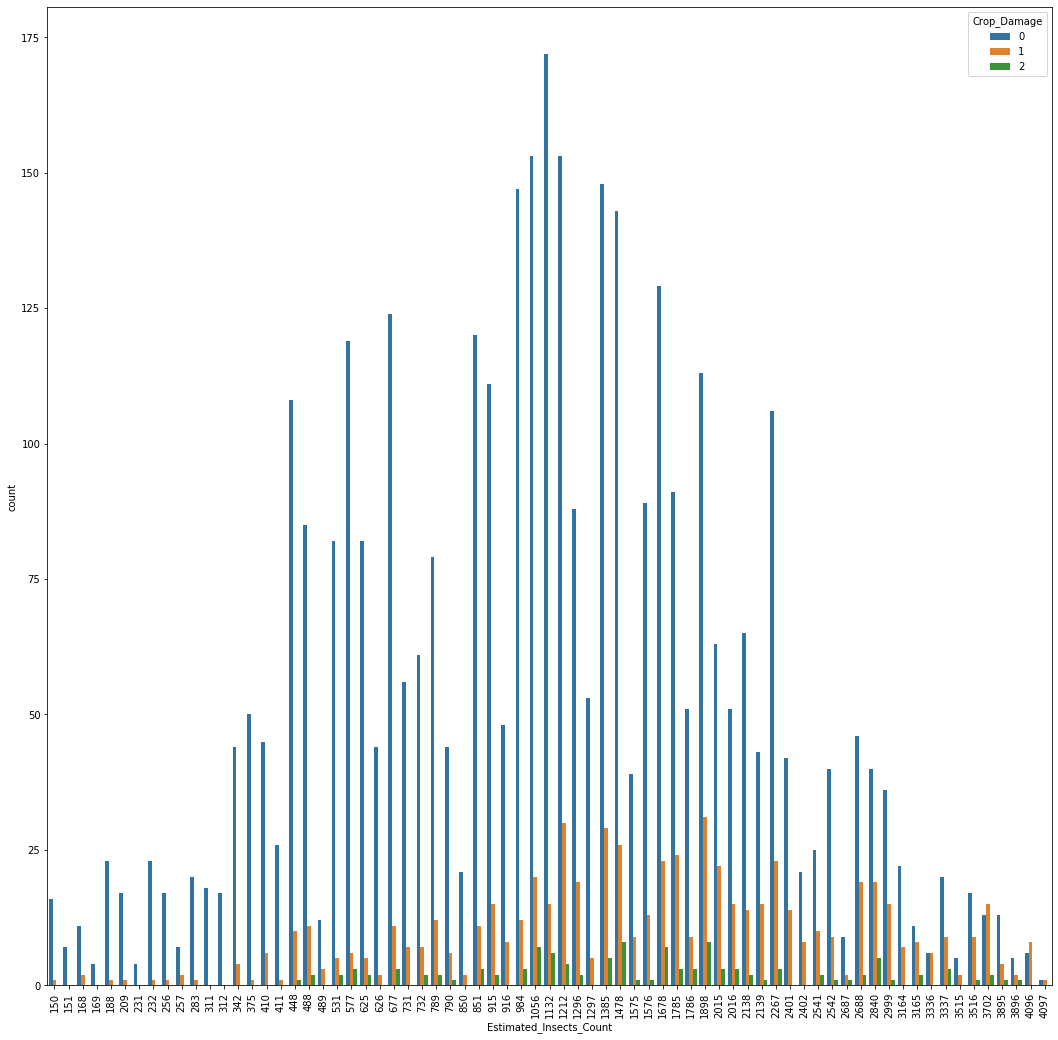

In [22]:
#Now let us visualize that how estimated_insects_count impact crop
plt.subplots(figsize=(18,18))
sns.countplot(x='Estimated_Insects_Count',hue='Crop_Damage',data=Train_data)
plt.xticks(rotation=90)

Observation:Here we can see that less the number of insects more will be the chance for crop to stay alive.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

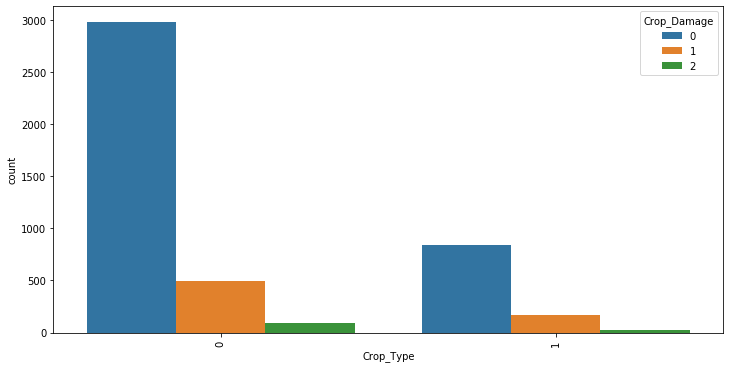

In [23]:
#Now let us visualize that how crop type impact crop_damage
plt.subplots(figsize=(12,6))
sns.countplot(x='Crop_Type',hue='Crop_Damage',data=Train_data)
plt.xticks(rotation=90)

Observation: Here we can see that crop type 0 has more chances to stay alive.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

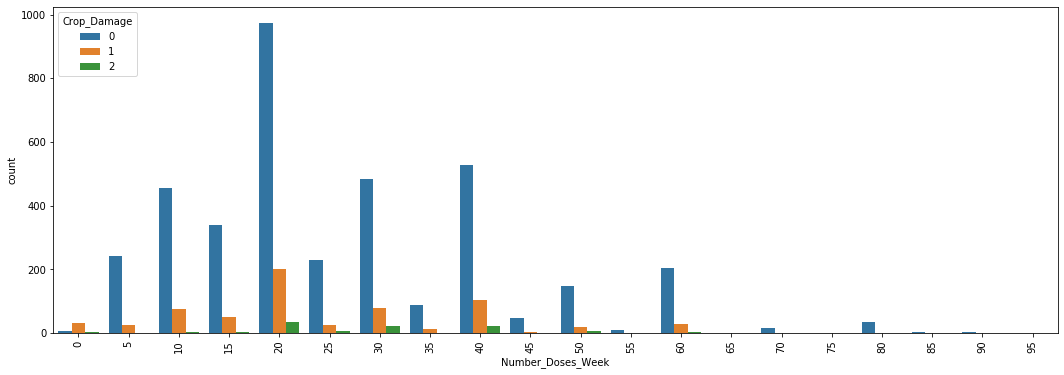

In [24]:
#Now let us visualize that how number of doses per week impacting the crop damage
plt.subplots(figsize=(18,6))
sns.countplot(x='Number_Doses_Week',hue='Crop_Damage',data=Train_data)
plt.xticks(rotation=90)

Observation: 20 doses per week is sufficient for the crop to stay alive.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

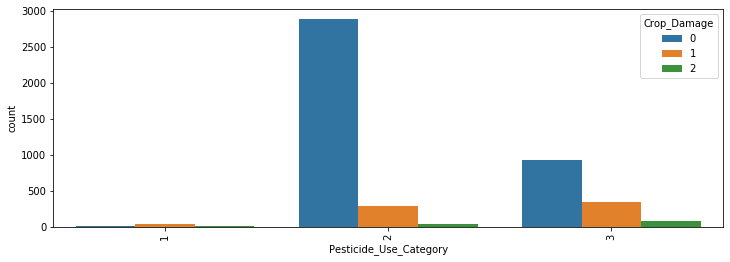

In [25]:
#Now let us visualize that how pesticite_use category impacting crop
plt.subplots(figsize=(12,4))
sns.countplot(x='Pesticide_Use_Category',hue='Crop_Damage',data=Train_data)
plt.xticks(rotation=90)

Observation: Pesticide_use_category 2 is more helpfull to keep the crop alive. So category 2 is the best among all.

# Finding Correlation

In [26]:
#finding correlation of each column with each other
Train_data.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.449470,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002237,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.098399,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.387982,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.104022,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.449470,-0.002237,-0.098399,0.387982,0.104022,1.000000,-0.467386,-0.011108,0.244988
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.467386,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.011108,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.244988,-0.152918,-0.016196,1.000000


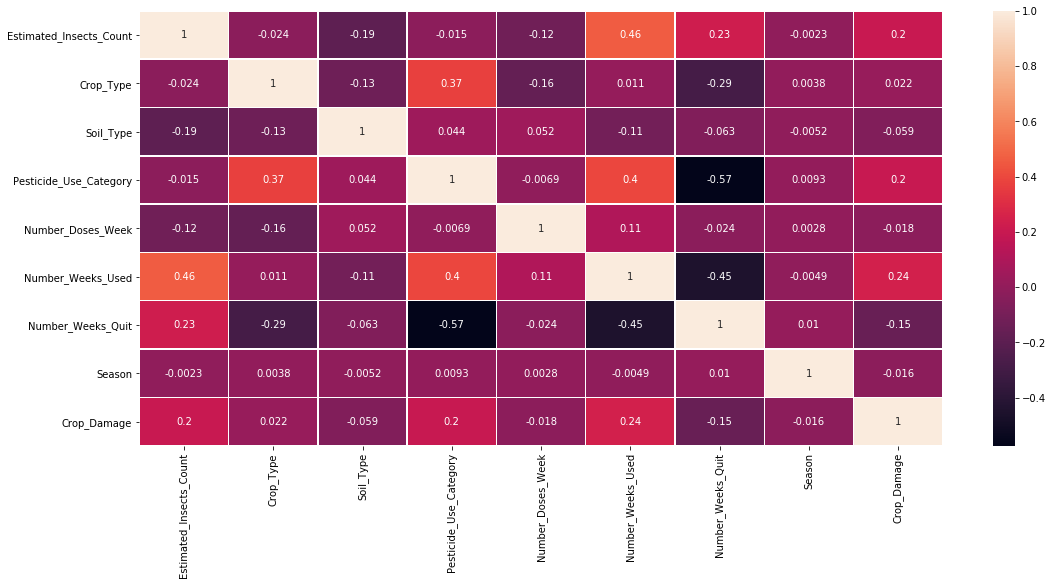

In [27]:
#visualization of correlation by using heatmap
plt.subplots(figsize=(18, 8))
sns.heatmap(df.corr(),annot=True,linewidths=.5)

Observation: Here we can see that soil type is very less correlated among all. However pesticides used is highly correlated.

In [28]:
#replacing null values
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mean(),inplace=True)

In [29]:
#Let's check the missing values.
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used             0
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
source                        0
dtype: int64

In [30]:
#dropping unnecessary columns
df.drop(['ID'],axis=1,inplace=True)
df

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,188,1,0,1,0,0.000000,0,1,0.0,train
1,209,1,0,1,0,0.000000,0,2,1.0,train
2,257,1,0,1,0,0.000000,0,2,1.0,train
3,257,1,1,1,0,0.000000,0,2,1.0,train
4,342,1,0,1,0,0.000000,0,2,1.0,train
...,...,...,...,...,...,...,...,...,...,...
5793,1132,0,1,2,40,34.000000,7,3,NaN,test
5794,1132,0,1,2,40,25.000000,3,1,NaN,test
5795,1132,0,1,2,20,13.000000,23,1,NaN,test
5796,1212,0,1,2,10,35.000000,5,1,NaN,test


In [31]:
#adding extra column in the dataset to identify which is the training or testing dataset
train=df.loc[df['source']=='train']
test=df.loc[df['source']=='test']


In [32]:
#checking training dataset
train

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,188,1,0,1,0,0.000000,0,1,0.0,train
1,209,1,0,1,0,0.000000,0,2,1.0,train
2,257,1,0,1,0,0.000000,0,2,1.0,train
3,257,1,1,1,0,0.000000,0,2,1.0,train
4,342,1,0,1,0,0.000000,0,2,1.0,train
...,...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,28.920374,1,1,1.0,train
4595,2139,0,1,2,30,47.000000,2,1,1.0,train
4596,2267,0,1,2,10,7.000000,27,2,0.0,train
4597,2267,0,1,2,10,20.000000,24,2,0.0,train


In [33]:
#checking testing dataset
test

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
4599,188,1,1,1,0,28.920374,0,2,NaN,test
4600,410,1,1,1,0,0.000000,0,2,NaN,test
4601,626,1,0,1,0,0.000000,0,2,NaN,test
4602,731,1,0,1,0,0.000000,0,2,NaN,test
4603,789,0,0,1,0,0.000000,0,1,NaN,test
...,...,...,...,...,...,...,...,...,...,...
5793,1132,0,1,2,40,34.000000,7,3,NaN,test
5794,1132,0,1,2,40,25.000000,3,1,NaN,test
5795,1132,0,1,2,20,13.000000,23,1,NaN,test
5796,1212,0,1,2,10,35.000000,5,1,NaN,test


In [34]:
#droping character type data and the column having very less correlation (feature selection)
train.drop(['Crop_Damage','source','Soil_Type'],axis=1,inplace=True)

In [35]:
test.drop(['Crop_Damage','source','Soil_Type'],axis=1,inplace=True)

In [36]:
#training the model
x_train1 = train
x_test1= test
y_train1=Train_data['Crop_Damage']

In [37]:
#importing models and metrics from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [38]:
#transforming the data to reduce skewness
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train1=scale.fit_transform(x_train1)

In [39]:
#finding best randomstate for train test split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x_train1,y_train1,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=accuracy_score(y_test,y_pred)
        print("accuracy score corresponding to",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max accuracy score corresponding to",final_r_state,"is",max_r_score)  
    return final_r_state

In [40]:
#finding best random state
from sklearn.linear_model import LogisticRegression
regr=LogisticRegression()
r_state=maxr2_score(regr,x_train1,y_train1)

accuracy score corresponding to 42 is 0.8206521739130435
accuracy score corresponding to 43 is 0.8434782608695652
accuracy score corresponding to 44 is 0.8217391304347826
accuracy score corresponding to 45 is 0.8195652173913044
accuracy score corresponding to 46 is 0.8326086956521739
accuracy score corresponding to 47 is 0.8228260869565217
accuracy score corresponding to 48 is 0.8043478260869565
accuracy score corresponding to 49 is 0.808695652173913
accuracy score corresponding to 50 is 0.8380434782608696
accuracy score corresponding to 51 is 0.8326086956521739
accuracy score corresponding to 52 is 0.8228260869565217
accuracy score corresponding to 53 is 0.8434782608695652
accuracy score corresponding to 54 is 0.816304347826087
accuracy score corresponding to 55 is 0.8195652173913044
accuracy score corresponding to 56 is 0.8282608695652174
accuracy score corresponding to 57 is 0.8
accuracy score corresponding to 58 is 0.8152173913043478
accuracy score corresponding to 59 is 0.82391304

In [54]:
#dividing the data into train and test by using train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train1,y_train1,test_size=.22,random_state=43)

In [55]:
#Importing models for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Hyperparameter tunning by using GridSearchCV

In [56]:
#parameters for knn
neighbors={"n_neighbors":range(1,20)}
knc=KNeighborsClassifier()
gknc=GridSearchCV(knc,neighbors,cv=10)
gknc.fit(x_train1,y_train1)
gknc.best_params_

{'n_neighbors': 18}

In [57]:
#parameters for random forest
rfc = RandomForestClassifier()
param_grid = {
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(rfc, param_grid, n_jobs=-1, cv=5)

grid.fit(x_train1,y_train1)
grid.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 20}

In [58]:
#best parameters for AdaBoostClassifier
n_estimators={"n_estimators":range(1,25)}
adc=AdaBoostClassifier()
gadc=GridSearchCV(adc,n_estimators,cv=10)
gadc.fit(x_train1,y_train1)
gadc.best_params_

{'n_estimators': 1}

In [59]:
#best parameters for decisiontreeclassifier
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtc=DecisionTreeClassifier()    
gdtc=GridSearchCV(dtc, param_grid, cv=5)
gdtc.fit(x_train1,y_train1)
gdtc.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [60]:
#best parameters for support vector classifier
parameters={'kernel':('linear','poly','rbf','sigmoid'),'C':[1,10]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x_train1,y_train1)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.8353981170459385
poly
{'C': 1, 'kernel': 'poly'}


In [61]:
#best parameter for gradiantboosting classifier
n_estimators={"n_estimators":range(1,25)}
gbc=GradientBoostingClassifier()
gc=GridSearchCV(gbc,n_estimators,cv=10)
gc.fit(x_train1,y_train1)
gc.best_params_

{'n_estimators': 9}

In [62]:
#fitting best parameters
knc=KNeighborsClassifier(n_neighbors=18)
svc=SVC(C= 1, kernel='poly')
dtc=DecisionTreeClassifier(criterion='gini', max_depth=3)
rfc=RandomForestClassifier(bootstrap= True, max_features='sqrt',min_samples_split= 8,n_estimators=20)
adc=AdaBoostClassifier(n_estimators=1)
gbc=GradientBoostingClassifier(n_estimators=9)
lr=LogisticRegression()

In [63]:
#building different models
models=[]
models.append(('KNeighborsClassifier',knc))
models.append(('SupportVectorClassifier',svc))
models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifierClassifier',adc))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GradientBoostingClassifier',gbc))
models.append(('LogisticRegression',lr))

In [64]:
#importing models for cross_val_score, roc_curve,auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc

In [65]:
#applying for looping to run all the models in one go
Models=[]
score=[]
cvs=[]


for name,model in models:
    print('*****************',name,'**********************')
    print('\n')
    Models.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x_train1,y_train1,cv=10,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')    
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    
    

***************** KNeighborsClassifier **********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')


Accuracy_score= 0.8399209486166008


Cross_val_score= 0.7934417921758075


classification_report
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       861
           1       0.31      0.09      0.14       123
           2       0.00      0.00      0.00        28

    accuracy                           0.84      1012
   macro avg       0.39      0.35      0.35      1012
weighted avg       0.77      0.84      0.79      1012



[[839  22   0]
 [112  11   0]
 [ 25   3   0]]


***************** SupportVectorClassifier **********************


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
  

In [66]:
result=pd.DataFrame({'Model':Models,'Accuracy_score':score,'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,83.992095,79.344179
1,SupportVectorClassifier,85.177866,82.344179
2,RandomForestClassifier,83.596838,78.822487
3,AdaBoostClassifierClassifier,85.079051,83.061571
4,DecisionTreeClassifier,85.177866,81.583310
5,GradientBoostingClassifier,85.177866,83.496353
6,LogisticRegression,84.189723,81.365918


In [67]:
#saving the model
from sklearn.externals import joblib
joblib.dump(gbc,'agri.pkl')

['agri.pkl']